# Problem Statement 

**The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.**

Dataset link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

# **Let's start with importing necessary libraries**

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [4]:
## Reading the data
Diabetes_data = pd.read_csv('diabetes.csv')         
Diabetes_data.head()     # Reading first five rows.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [5]:
# from .info() we get the information about null count and data type of each columns
Diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# from .describe() we get general idea about dataset
Diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checking for null values
Diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It seems that there are no missing values in our data. Great, let's see the distribution of data:

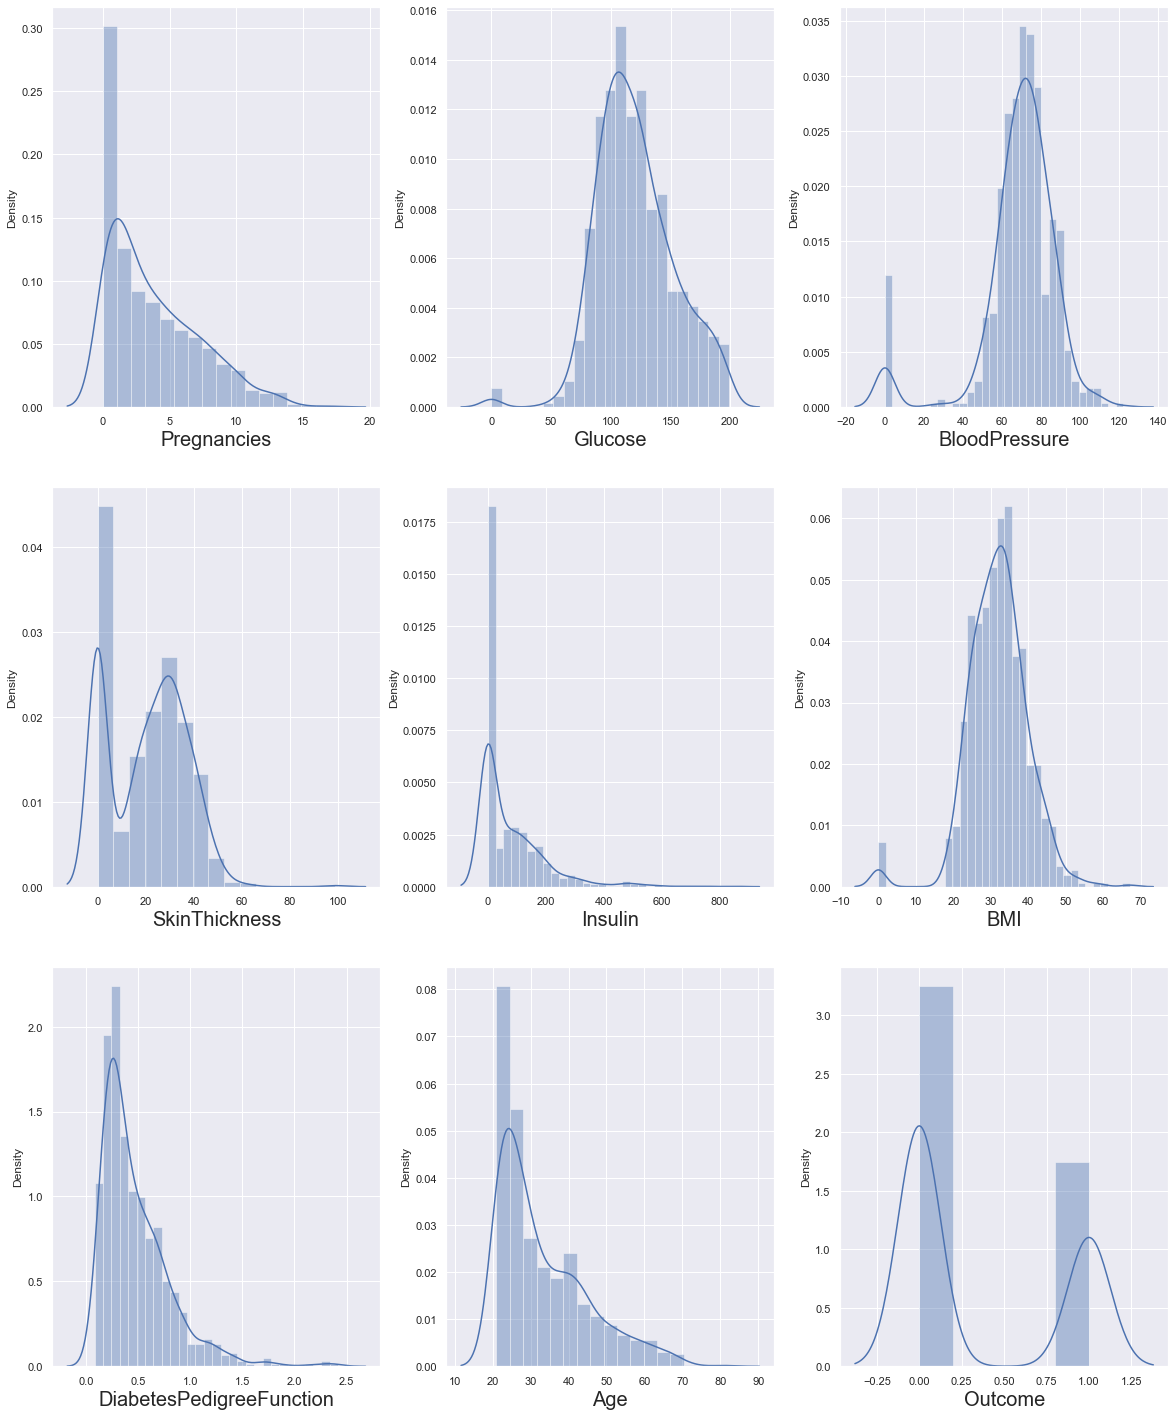

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Diabetes_data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [9]:
# Replacing zero values with the mean of the column
Diabetes_data['BMI'] = Diabetes_data['BMI'].replace(0,Diabetes_data['BMI'].mean())

In [10]:
# In the similar way we can replace for other column also.
Diabetes_data['BMI'] = Diabetes_data['BMI'].replace(0,Diabetes_data['BMI'].mean())
Diabetes_data['BloodPressure'] = Diabetes_data['BloodPressure'].replace(0,Diabetes_data['BloodPressure'].mean())
Diabetes_data['Glucose'] = Diabetes_data['Glucose'].replace(0,Diabetes_data['Glucose'].mean())
Diabetes_data['Insulin'] = Diabetes_data['Insulin'].replace(0,Diabetes_data['Insulin'].mean())
Diabetes_data['SkinThickness'] = Diabetes_data['SkinThickness'].replace(0,Diabetes_data['SkinThickness'].mean())

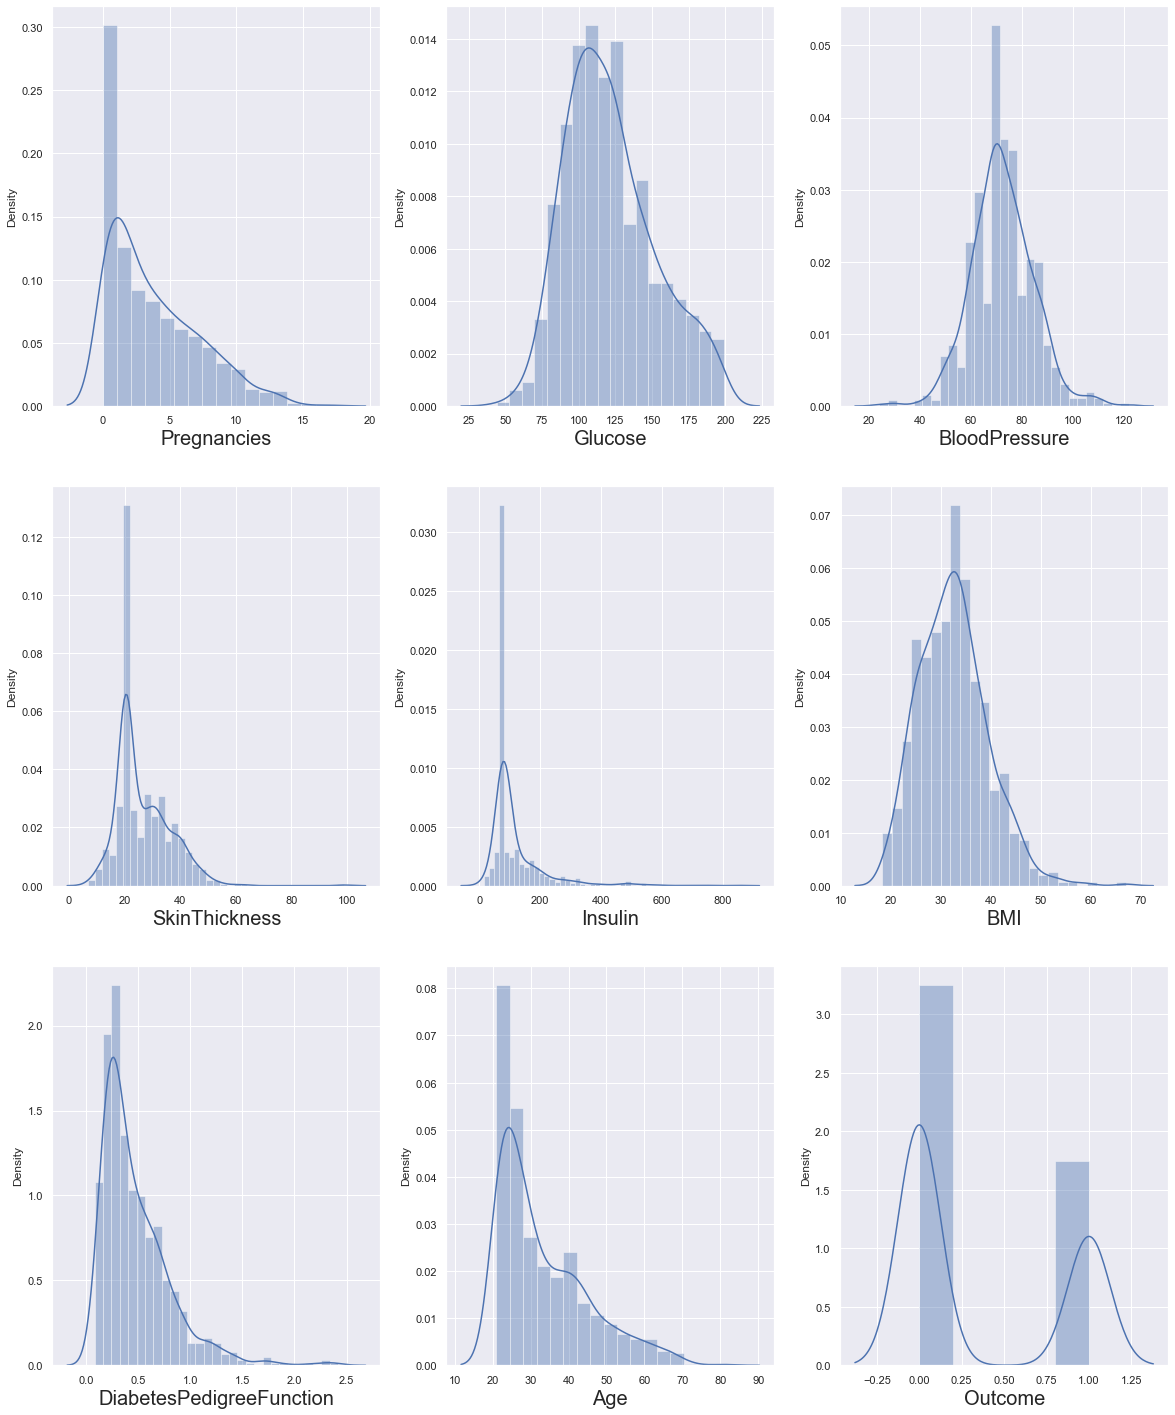

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Diabetes_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
q = Diabetes_data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
Diabetes_data_cleaned = Diabetes_data[Diabetes_data['Pregnancies']<q]
q = Diabetes_data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['BMI']<q]
q = Diabetes_data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['SkinThickness']<q]
q = Diabetes_data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['Insulin']<q]
q = Diabetes_data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['DiabetesPedigreeFunction']<q]
q = Diabetes_data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['Age']<q]

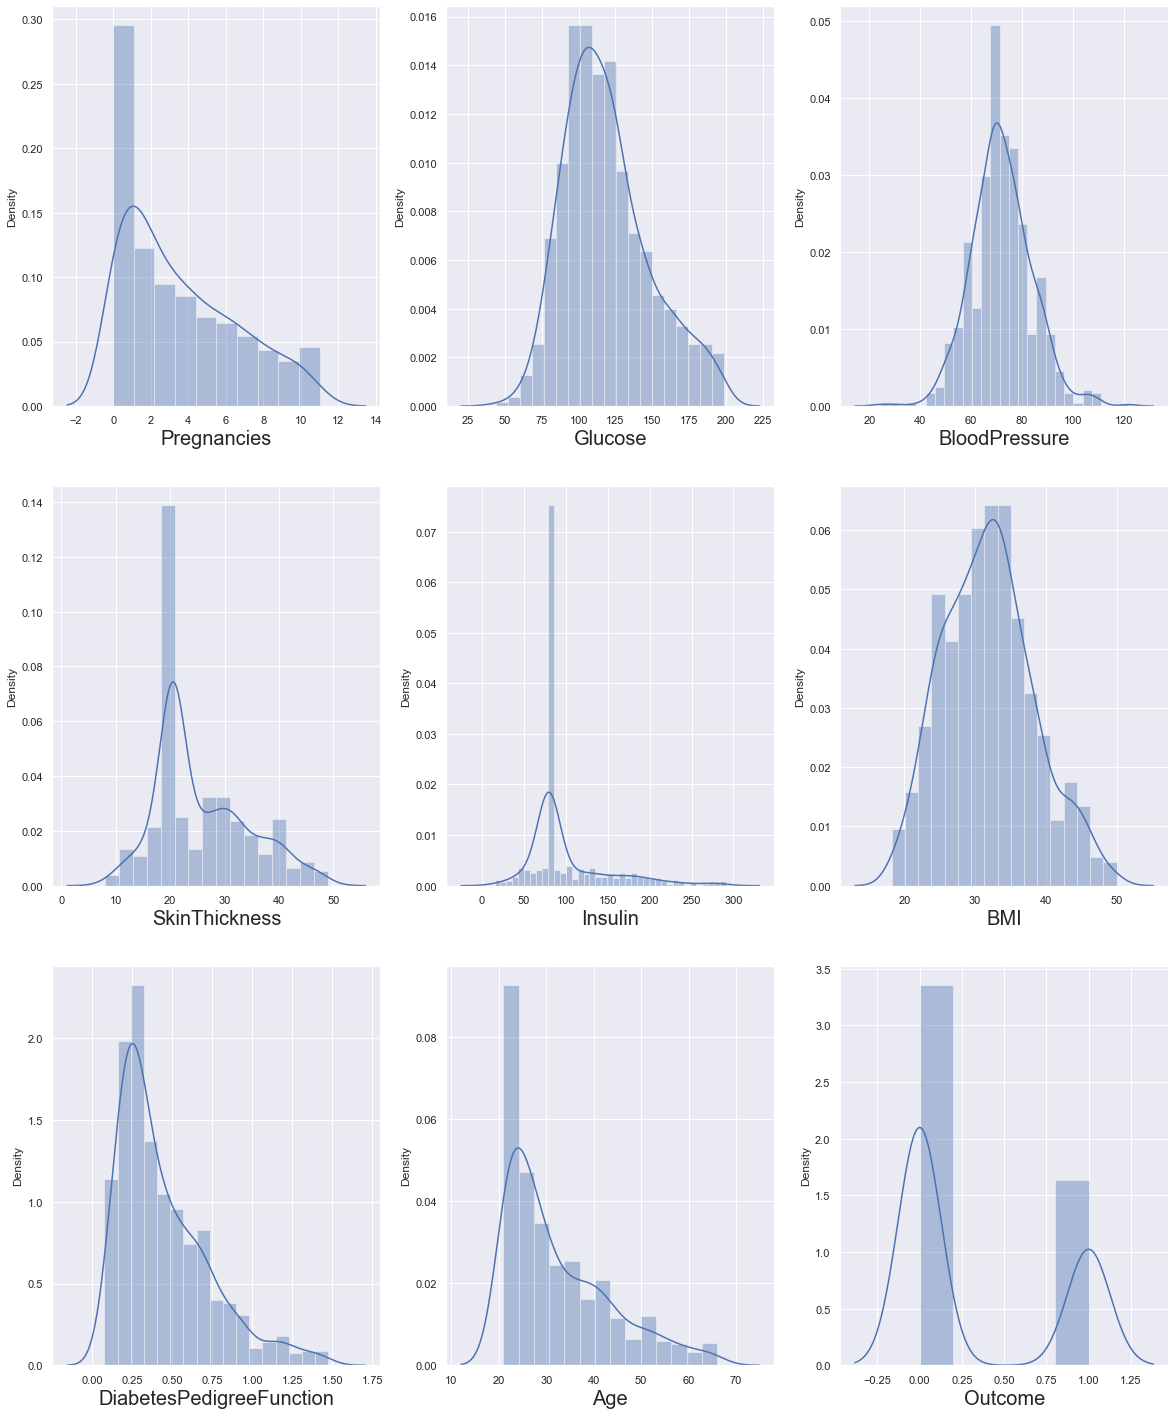

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Diabetes_data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Diabetes_data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


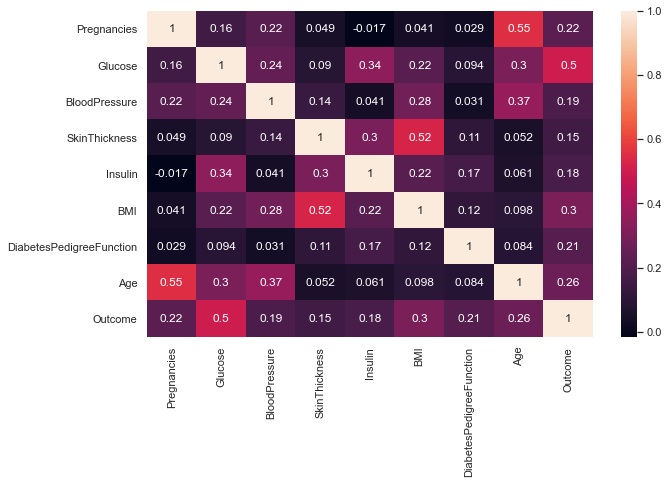

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(Diabetes_data_cleaned.corr(), annot=True)
plt.show()

<AxesSubplot:>

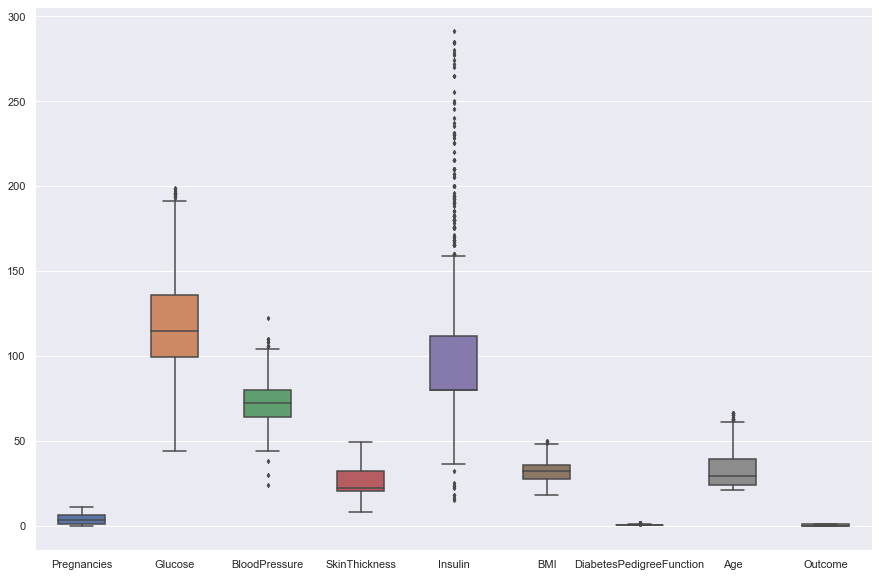

In [15]:
# Creating box plot for data distribution.
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=Diabetes_data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [16]:
X = Diabetes_data_cleaned.drop(columns = ['Outcome'])
y = Diabetes_data_cleaned['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

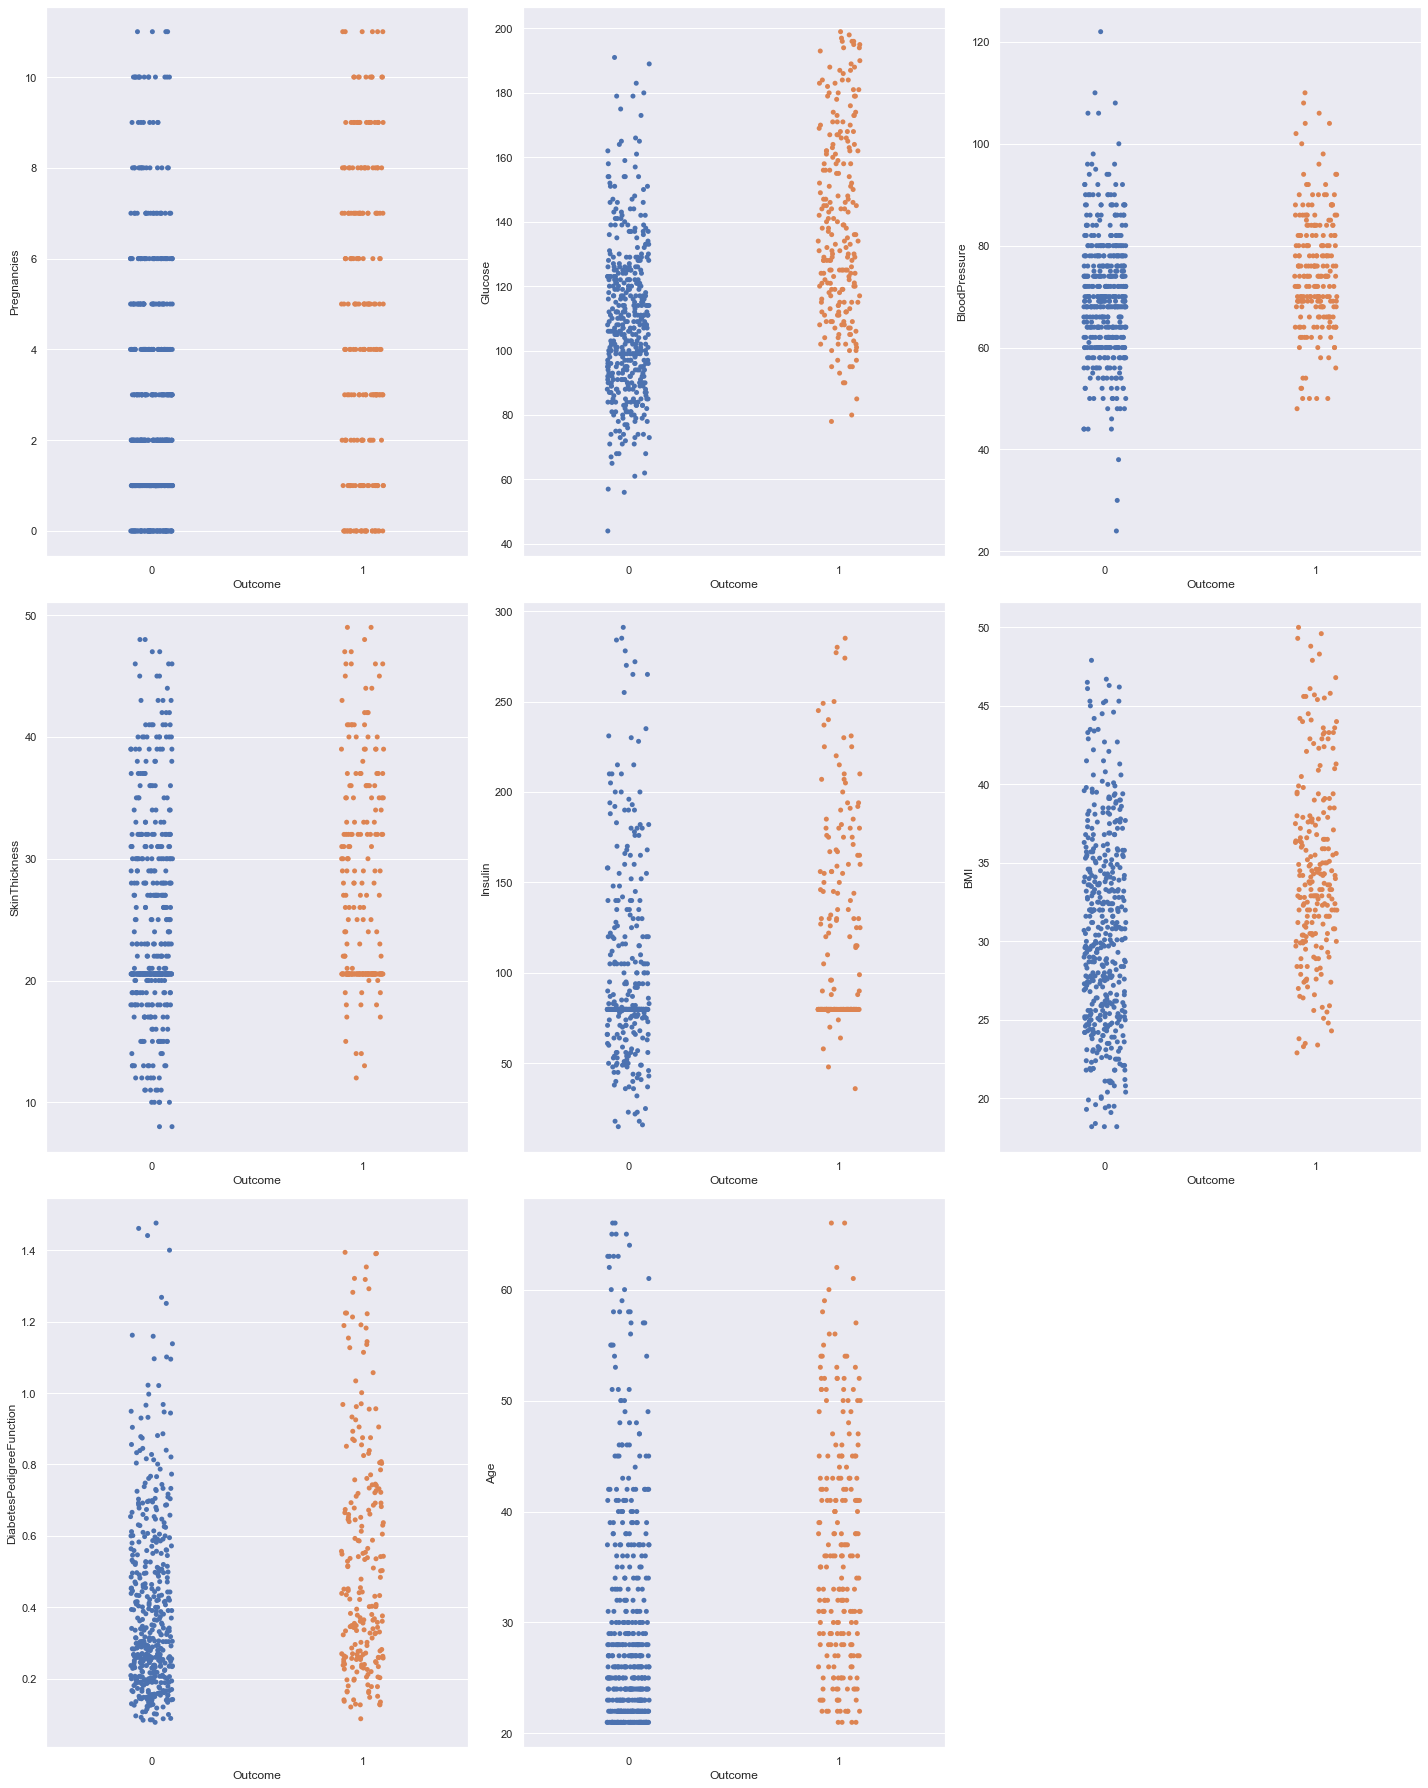

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's check for  multicollinearity in the dependent variables by variance influence factors.
Before that, we should scale our data. Let's use the standard scaler for that.


In [19]:
# Scaling given dataset using Standard Scaler.
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [20]:
# Checking for multicollinearity using vif
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.


In [21]:
#Splitting our data in trian and test samples
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [22]:
# Applying Logistic regression algorithm 
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [23]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [26]:
#Chechking accurancy of the model
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.834319526627219

In [27]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,   8],
       [ 20,  32]], dtype=int64)

In [28]:
# Set the following variables to find out precision, recall and other cruical factors to evaluate our model
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
# The formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

In [30]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9316239316239316

In [31]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8449612403100775

In [32]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8861788617886178

In [33]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7735042735042735

**Now looking for ROC**

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

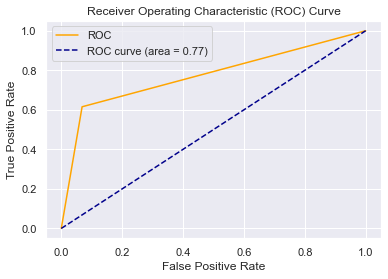

In [35]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
